# WeatherPy
----

### Analysis
* There was no clear relationship between latitude and humidity although it is interesting to note that all cities sampled near the equator (0 latitude) had humidity above 60% with the frequency of dryer regions increasing as latitude approaches ±20.
* Max temperatures were generally consistent within the region ±20 degrees from the equator. Max temps dipped faster in the northern hemisphere possibly due to greater land mass in the northern vs. southern hemispheres.
* The greatest concentration of cities with high wind speeds were located at the extreme northern latitudes.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
record = 1
store_weather = []
for city in cities:
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    params = {
        "appid": api_key,
        "units": "imperial",
        "q": city
        }
    response = requests.get(base_url, params=params)
    weather_data = response.json()
    store_weather.append(weather_data)
    try:
        print(f"Processing Record {record} | {weather_data['name']}")
    except:
        print(f"{city} not found. Skipping...")
    # Increase counter by one 
    record= record + 1

illoqqortoormiut not found. Skipping...
Processing Record 2 | Holland
gogrial not found. Skipping...
Processing Record 4 | Kahului
Processing Record 5 | Petropavlovsk-Kamchatskiy
Processing Record 6 | Norman Wells
Processing Record 7 | Rikitea
manzil jamil not found. Skipping...
Processing Record 9 | Kodiak
Processing Record 10 | Khasan
Processing Record 11 | Kaitangata
Processing Record 12 | Axim
Processing Record 13 | Luderitz
bolungarvik not found. Skipping...
Processing Record 15 | Graham
Processing Record 16 | Nanortalik
Processing Record 17 | Kiama
Processing Record 18 | Tasiilaq
Processing Record 19 | Lamar
Processing Record 20 | Bethel
Processing Record 21 | Saldanha
taolanaro not found. Skipping...
belushya guba not found. Skipping...
Processing Record 24 | Marawi
Processing Record 25 | Ponta Delgada
Processing Record 26 | Vaini
sattankulam not found. Skipping...
Processing Record 28 | Tsogni
Processing Record 29 | Baneh
kazalinsk not found. Skipping...
Processing Record 31 | 

Processing Record 250 | Hasaki
Processing Record 251 | Vostok
Processing Record 252 | Mayumba
Processing Record 253 | Port Augusta
Processing Record 254 | Novoseleznevo
Processing Record 255 | Leh
odweyne not found. Skipping...
Processing Record 257 | Tigil
Processing Record 258 | Grand Gaube
Processing Record 259 | Finschhafen
Processing Record 260 | Balabac
Processing Record 261 | Hofn
Processing Record 262 | Shingu
Processing Record 263 | Port Pirie
Processing Record 264 | Dunedin
Processing Record 265 | Aden
Processing Record 266 | Havre-Saint-Pierre
Processing Record 267 | Namibe
Processing Record 268 | Dukat
Processing Record 269 | Severo-Kurilsk
Processing Record 270 | Biri
tsihombe not found. Skipping...
Processing Record 272 | Rawson
Processing Record 273 | Fukagawa
olafsvik not found. Skipping...
andenes not found. Skipping...
Processing Record 276 | Cockburn Town
Processing Record 277 | Keskin
Processing Record 278 | Isangel
Processing Record 279 | Byron Bay
Processing Recor

Processing Record 499 | Le Port
Processing Record 500 | Santa Rosa
Processing Record 501 | Shimoda
Processing Record 502 | Galesong
Processing Record 503 | Lyuban
Processing Record 504 | Whitianga
Processing Record 505 | Wladyslawowo
Processing Record 506 | Makubetsu
tapaua not found. Skipping...
Processing Record 508 | Camacha
Processing Record 509 | Okhotsk
Processing Record 510 | Salinas
Processing Record 511 | Grindavik
Processing Record 512 | Tiarei
Processing Record 513 | Rabo de Peixe
Processing Record 514 | Xihe
Processing Record 515 | Sao Joao da Barra
Processing Record 516 | Santiago de Cuba
Processing Record 517 | Flinders
Processing Record 518 | Chicama
Processing Record 519 | Keuruu
Processing Record 520 | Zyryanka
Processing Record 521 | Jumla
Processing Record 522 | Porto Novo
Processing Record 523 | Warrington
Processing Record 524 | Ashland
Processing Record 525 | Usinsk
Processing Record 526 | Effingham
Processing Record 527 | Imeni Poliny Osipenko
Processing Record 5

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame(store_weather)

In [5]:
newWeather_df = pd.DataFrame({'name' : weather_df['name'], 
                              'sys' : weather_df['sys'],
                              'dt' : weather_df['dt'],
                              'clouds' : weather_df['clouds'], 
                              'main' : weather_df['main'],
                              'wind' : weather_df['wind'],
                              'coord' : weather_df['coord']})
newWeather_clean = newWeather_df.dropna()

In [6]:
newWeather_clean.head()

,name,sys,dt,clouds,main,wind,coord
1,Holland,"{'type': 1, 'id': 3442, 'message': 0.006, 'cou...",1.551830e+09,{'all': 90},"{'temp': 15.66, 'pressure': 1019, 'humidity': ...","{'speed': 17.22, 'deg': 280, 'gust': 10.3}","{'lon': -86.11, 'lat': 42.79}"
3,Kahului,"{'type': 1, 'id': 7879, 'message': 0.0046, 'co...",1.551830e+09,{'all': 75},"{'temp': 73.65, 'pressure': 1018, 'humidity': ...","{'speed': 16.11, 'deg': 50, 'gust': 11.3}","{'lon': -156.47, 'lat': 20.89}"
4,Petropavlovsk-Kamchatskiy,"{'type': 1, 'id': 8887, 'message': 0.0035, 'co...",1.551829e+09,{'all': 76},"{'temp': 14, 'pressure': 998, 'humidity': 51, ...",{'speed': 2.24},"{'lon': 158.65, 'lat': 53.05}"
5,Norman Wells,"{'type': 1, 'id': 951, 'message': 0.0049, 'cou...",1.551827e+09,{'all': 20},"{'temp': 19.4, 'pressure': 1024, 'humidity': 5...","{'speed': 8.05, 'deg': 120}","{'lon': -126.83, 'lat': 65.28}"
6,Rikitea,"{'message': 0.005, 'country': 'PF', 'sunrise':...",1.551830e+09,{'all': 76},"{'temp': 80.82, 'pressure': 1015.09, 'humidity...","{'speed': 15.12, 'deg': 81.0031}","{'lon': -134.97, 'lat': -23.12}"


In [7]:
clean_df = pd.DataFrame({"Name" : newWeather_clean['name'],
                         "Country" : newWeather_clean['sys'].apply(lambda sys: sys['country']),
                         "Date" : newWeather_clean['dt'], 
                         "Cloudiness" : newWeather_clean['clouds'].apply(lambda clouds: clouds['all']), 
                         "Humidity" : newWeather_clean['main'].apply(lambda main_h: main_h['humidity']), 
                         "Wind Speed" : newWeather_clean['wind'].apply(lambda wind: wind['speed']), 
                         "Max Temp" : newWeather_clean['main'].apply(lambda main_t: main_t['temp_max']),
                         "Latitude" : newWeather_clean['coord'].apply(lambda lat: lat['lat']),
                         "Longitude" : newWeather_clean['coord'].apply(lambda lon: lon['lon'])
                         })

In [8]:
clean_df.head()

,Name,Country,Date,Cloudiness,Humidity,Wind Speed,Max Temp,Latitude,Longitude
1,Holland,US,1.551830e+09,90,72,17.22,19.00,42.79,-86.11
3,Kahului,US,1.551830e+09,75,53,16.11,78.01,20.89,-156.47
4,Petropavlovsk-Kamchatskiy,RU,1.551829e+09,76,51,2.24,14.00,53.05,158.65
5,Norman Wells,CA,1.551827e+09,20,57,8.05,19.40,65.28,-126.83
6,Rikitea,PF,1.551830e+09,76,97,15.12,80.82,-23.12,-134.97


In [9]:
clean_df.to_csv("city_weather.csv", na_rep="NaN", columns=('Name', 
                                                           'Country', 
                                                           'Date', 
                                                           'Cloudiness', 
                                                           'Humidity', 
                                                           'Wind Speed', 
                                                           'Max Temp', 
                                                           'Latitude', 
                                                           'Longitude'), index=False)

In [2]:
csv_file = "city_weather.csv"
city_weather_df = pd.read_csv(csv_file)
city_weather_df.head()

,Name,Country,Date,Cloudiness,Humidity,Wind Speed,Max Temp,Latitude,Longitude
0,Holland,US,1.551830e+09,90,72,17.22,19.00,42.79,-86.11
1,Kahului,US,1.551830e+09,75,53,16.11,78.01,20.89,-156.47
2,Petropavlovsk-Kamchatskiy,RU,1.551829e+09,76,51,2.24,14.00,53.05,158.65
3,Norman Wells,CA,1.551827e+09,20,57,8.05,19.40,65.28,-126.83
4,Rikitea,PF,1.551830e+09,76,97,15.12,80.82,-23.12,-134.97


In [3]:
city_weather_df.count()

Name          573
Country       568
Date          573
Cloudiness    573
Humidity      573
Wind Speed    573
Max Temp      573
Latitude      573
Longitude     573
dtype: int64

In [4]:
city_weather_df.loc[pd.isnull(city_weather_df['Country'])]

,Name,Country,Date,Cloudiness,Humidity,Wind Speed,Max Temp,Latitude,Longitude
9,Luderitz,NaN,1.551831e+09,0,83,7.74,60.71,-26.65,15.16
397,Walvis Bay,NaN,1.551831e+09,20,82,8.05,66.99,-22.95,14.51
510,Maltahohe,NaN,1.551831e+09,88,23,3.15,78.57,-24.83,16.98
515,Opuwo,NaN,1.551831e+09,0,59,4.38,66.20,-18.06,13.84
544,Eenhana,NaN,1.551827e+09,64,54,17.22,78.80,-17.48,16.34


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

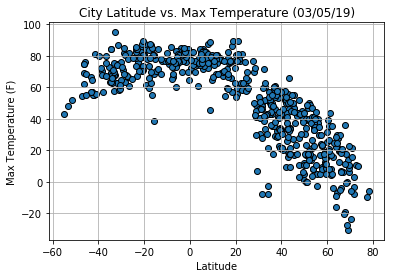

In [6]:
plt.scatter(city_weather_df['Latitude'], 
            city_weather_df['Max Temp'],
            marker = 'o',
            edgecolor = 'black'
            )
plt.grid(which = 'major', axis = 'both')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Max Temperature (03/05/19)')
plt.savefig('city_temp.pdf')
plt.show()

#### Latitude vs. Humidity Plot

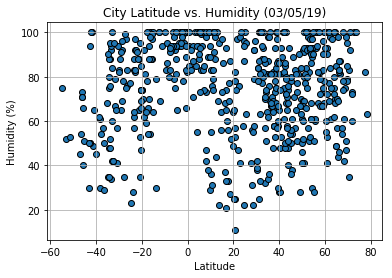

In [7]:
plt.scatter(city_weather_df['Latitude'], 
            city_weather_df['Humidity'],
            marker = 'o',
            edgecolor = 'black'
            )
plt.grid(which = 'major', axis = 'both')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Humidity (03/05/19)')
plt.savefig('city_humidity.pdf')
plt.show()

#### Latitude vs. Cloudiness Plot

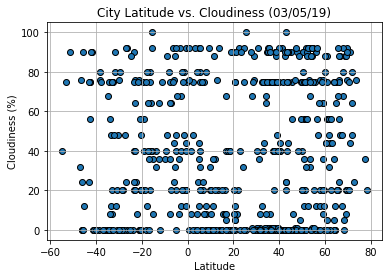

In [9]:
plt.scatter(city_weather_df['Latitude'], 
            city_weather_df['Cloudiness'],
            marker = 'o',
            edgecolor = 'black'
            )
plt.grid(which = 'major', axis = 'both')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Cloudiness (03/05/19)')
plt.savefig('city_cloudiness.pdf')
plt.show()

#### Latitude vs. Wind Speed Plot

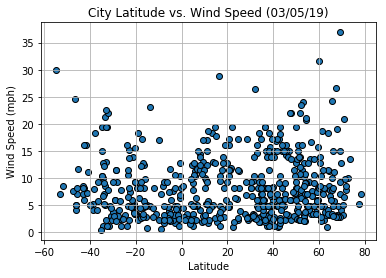

In [10]:
plt.scatter(city_weather_df['Latitude'], 
            city_weather_df['Wind Speed'],
            marker = 'o',
            edgecolor = 'black'
            )
plt.grid(which = 'major', axis = 'both')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.title('City Latitude vs. Wind Speed (03/05/19)')
plt.savefig('city_wind.pdf')
plt.show()